In [1]:
"""
Entrenar un modelo usando Spark y Numba CUDA
"""
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("SOFM").getOrCreate()
sc = spark.sparkContext

In [2]:
import som
import numpy as np
import math
import time

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
    
faces = fetch_olivetti_faces()['data']
rows = 20
cols = 20
d=faces.shape[1]
rdd = sc.parallelize(faces)

In [4]:
inicio = time.time()
weights=som.spark_gpu_batch_som(rdd, d, 5, rows, cols, seed=3)
fin = time.time()
print (fin - inicio)

41.99624800682068


In [5]:
weights

array([ 0.29329082,  0.30480313,  0.31752217, ...,  0.2076906 ,
        0.21167645,  0.21421178], dtype=float32)

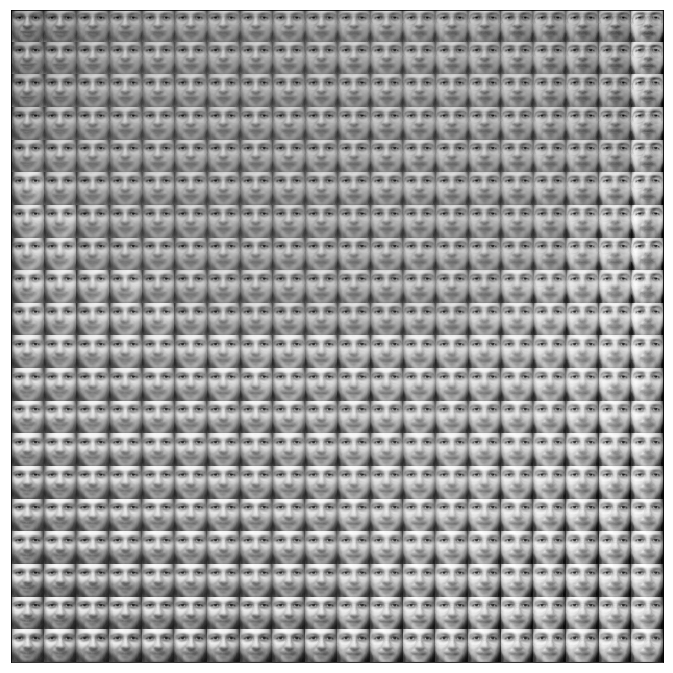

In [6]:
import numpy as np
W = weights.reshape((rows, cols, d))
pattern_length = faces.shape[1]
pattern_width = pattern_height = int(np.sqrt(pattern_length))
matrix_side = 20
matrix_w = np.empty((matrix_side * pattern_height, matrix_side * pattern_width))
matrix_w *= 255


for i in range(matrix_side):
    for j in range(matrix_side):
        matrix_w[i * pattern_height:i * pattern_height + pattern_height, 
j * pattern_height:j * pattern_height + pattern_width] = W[i, j].reshape((pattern_height, pattern_width)) * 255.0
fig, ax = plt.subplots(figsize=(12,12))

ax.matshow(matrix_w.tolist(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [7]:
inicio = time.time()
weights=som.spark_cpu_batch_som(rdd, d, 5, rows, cols)
fin = time.time()
print(fin - inicio)

41.743510007858276


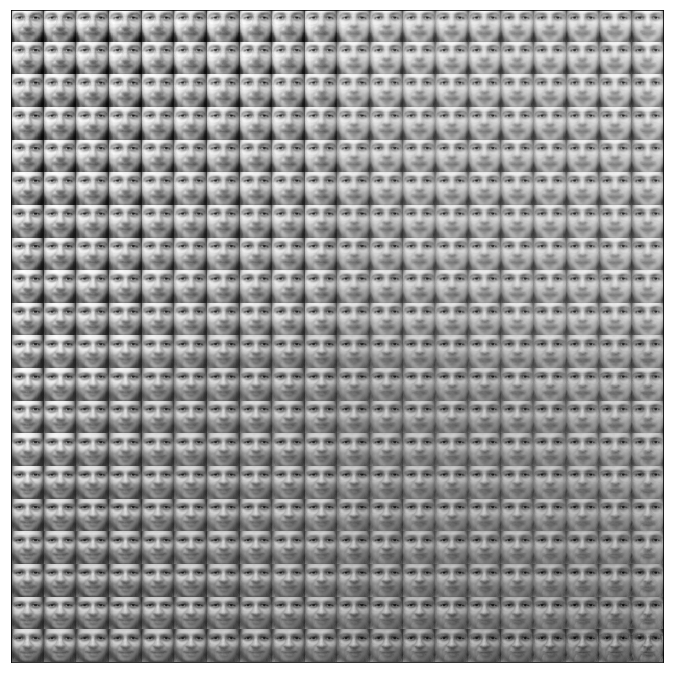

In [8]:
W = weights.reshape((rows, cols, d))
pattern_length = faces.shape[1]
pattern_width = pattern_height = int(np.sqrt(pattern_length))
matrix_side = 20
matrix_w = np.empty((matrix_side * pattern_height, matrix_side * pattern_width))
matrix_w *= 255


for i in range(matrix_side):
    for j in range(matrix_side):
        matrix_w[i * pattern_height:i * pattern_height + pattern_height, 
j * pattern_height:j * pattern_height + pattern_width] = W[i, j].reshape((pattern_height, pattern_width)) * 255.0
fig, ax = plt.subplots(figsize=(12,12))

ax.matshow(matrix_w.tolist(), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [9]:
"""
Ahora probamos con SUSY
"""

rdd2 = sc.textFile('../datasets/SUSY.csv')
# 2. Separamos y ponemos la etiqueta al final en vez de al principio

rdd2 = rdd2.map(lambda line: line.split(','))
rdd2 = rdd2.map(lambda line: line[1:])
d=18
rows = 8
cols = 7

In [10]:
inicio = time.time()
weights=som.spark_gpu_batch_som(rdd2, d, 1, rows, cols, sigma_0=5, tau=10, seed=3)
fin = time.time()

print(fin - inicio)

59.50713491439819


In [11]:
inicio = time.time()
cpu_weights=som.spark_cpu_batch_som(rdd2, d, 1, rows, cols, sigma_0=5, tau=10, seed=3)
fin = time.time()
print(fin - inicio)

341.77663564682007
